1) En un histograma o en un line plot, visualizar el número de tweets   conteniendo la palabra “goal”, cada minuto y cada 10 minutos. (BONUS:  gestionar las variantes “goaaal”, “goooaallll”, etc. utilizando  expresiones regulares).

In [1]:
#CREAR UN INDEX PARA ALMACENAR LOS DATOS
from elasticsearch import Elasticsearch
from pprint import pprint


es = Elasticsearch()

if not(es.indices.exists(index="prueba6")):
    res = es.indices.create(index="prueba6")  
    pprint(res)

In [2]:
#LISTAR LOS ARCHIVOS DEL DATASET
import json
import os
files = os.listdir("split_dataset_1")
pprint(len(files))

354585


In [3]:
from elasticsearch import helpers

#CARGAR LOS DATOS EN ELASTICSEARCH
tweets=[]

for filename in files:
    with open('split_dataset_1/'+filename) as f:
        try:
            #pprint(filename+':')
            tweet = json.load(f)
            timestamp=int(tweet["timestamp_ms"])
            #pprint(tweet)
            simple_tweet = {
                "timestamp":timestamp, \
                "date":tweet["created_at"], \
                "text": tweet['text'], \
                "username": tweet['user']['name'], \
                "location": tweet['user']['location']}
        except KeyError:
            error="error"
            
    tweets.append(simple_tweet)#remove comment
    
    #CARGAMOS LOS DATOS EN ELASTICSEARCH CON CONSULTAS 'BULK' PARA OPTIMIZAR EL PROCESO
    if (len(tweets)>=1000):
        i=0
        docs_as_string="["
        while i<1000:
            if i!=0:
                docs_as_string = docs_as_string + ','
            docs_as_string = docs_as_string + '\n' + json.dumps(tweets[i])
            i=i+1
        docs_as_string=docs_as_string+"]"
        res = helpers.bulk(es, json.loads(docs_as_string),index="prueba6", doc_type="_doc")
        tweets=[]


In [444]:
#CONSULTA BÁSICA A ELASTICSEARCH PARA PROBAR
from elasticsearch import Elasticsearch
from pprint import pprint
es = Elasticsearch()


In [445]:
res = es.search(index="prueba6", body={"query": {"match":{"text":"goal"}}})
print("Got %d Hits:" % res['hits']['total'])
for hit in res['hits']['hits']:
    print(hit["_source"])

Got 128818 Hits:
{'username': 'Preveza Epirus', 'location': 'Ελλάς', 'text': 'Goal goal goal goal goal goal!!!!!!!!!!!!!!!!!!!!!! #RealMadrid #RMALIV #UCLfinal', 'timestamp': 1527365608778}
{'username': 'Preveza Epirus', 'location': 'Ελλάς', 'text': 'Goal goal goal goal goal goal!!!!!!!!!!!!!!!!!!!!!! #RealMadrid #RMALIV #UCLfinal', 'timestamp': 1527365608778}
{'username': 'Preveza Epirus', 'location': 'Ελλάς', 'text': 'Goal goal goal goal goal goal!!!!!!!!!!!!!!!!!!!!!! #RealMadrid #RMALIV #UCLfinal', 'timestamp': 1527365608778}
{'date': 'Sat May 26 20:13:28 +0000 2018', 'username': 'Preveza Epirus', 'location': 'Ελλάς', 'text': 'Goal goal goal goal goal goal!!!!!!!!!!!!!!!!!!!!!! #RealMadrid #RMALIV #UCLfinal', 'timestamp': 1527365608778}
{'username': 'Preveza Epirus', 'location': 'Ελλάς', 'text': 'Goal goal goal goal goal goal!!!!!!!!!!!!!!!!!!!!!! #RealMadrid #RMALIV #UCLfinal', 'timestamp': 1527365608778}
{'username': 'Preveza Epirus', 'location': 'Ελλάς', 'text': 'Goal goal goal 

In [446]:
res = es.search(index="prueba6", body={"aggs" : { "tweets_over_time" : \
                                                            { "date_histogram" : { "field" : \
                                                                                  "timestamp", "interval" : "10m" \
                                                                                 }}}})

In [447]:
import pandas as pd
a=pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
a=a.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets'})


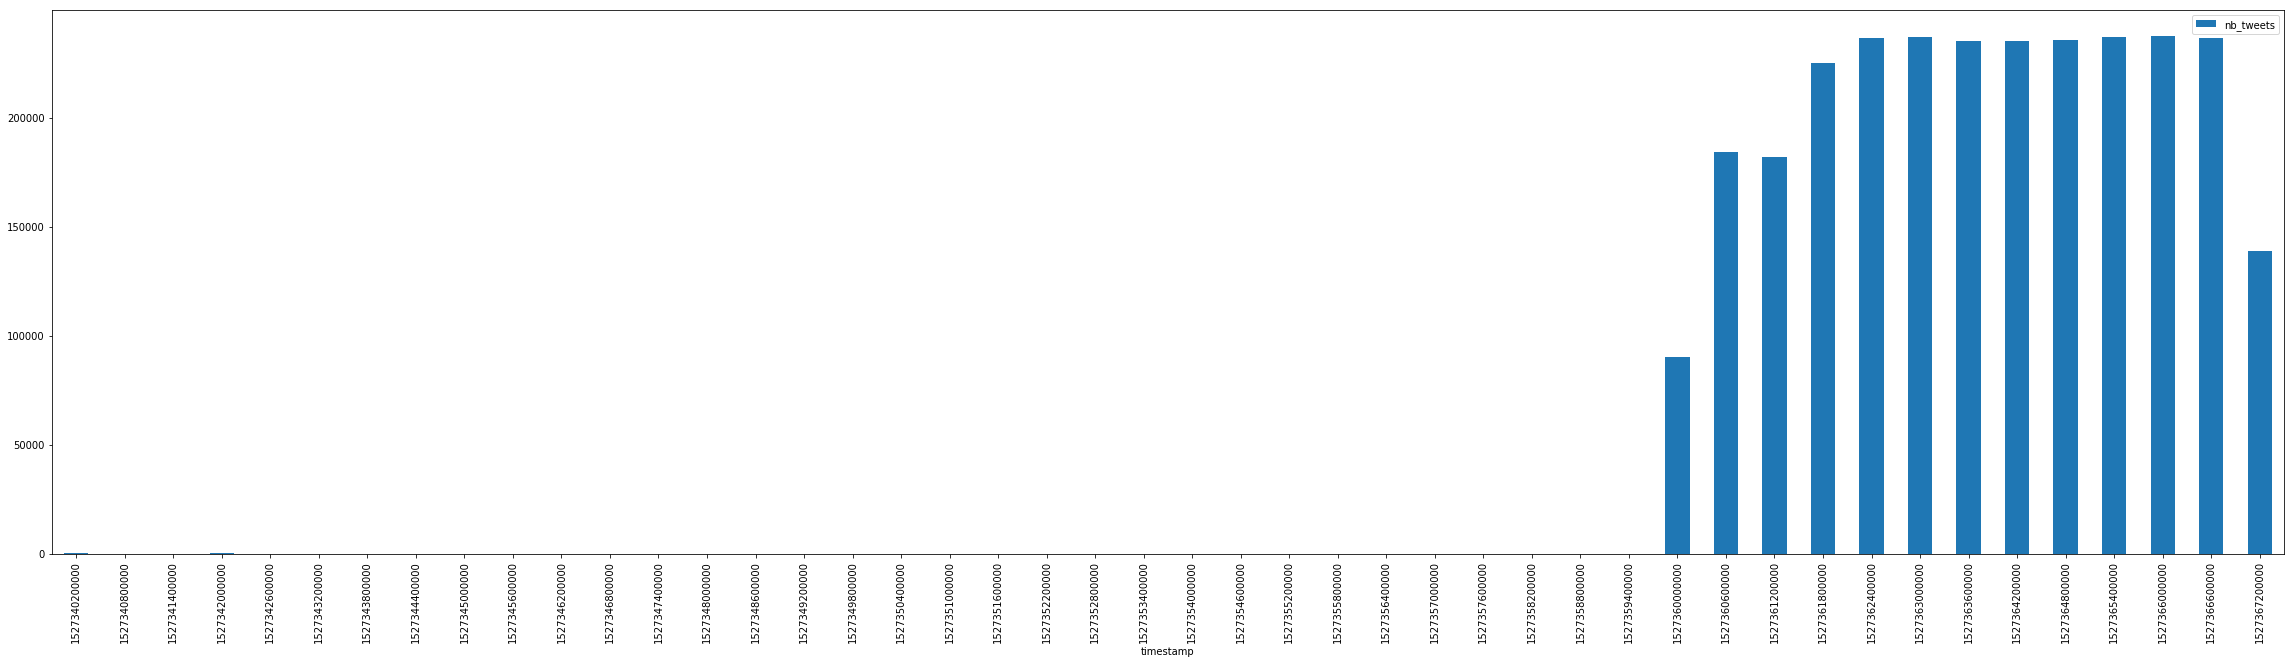

In [448]:
import matplotlib.pyplot as plt

a.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

In [449]:
res = es.search(index="prueba6", body={"aggs" : { "tweets_over_time" : \
                                                            { "date_histogram" : { "field" : \
                                                                                  "timestamp", "interval" : "1m" \
                                                                                 }}}})

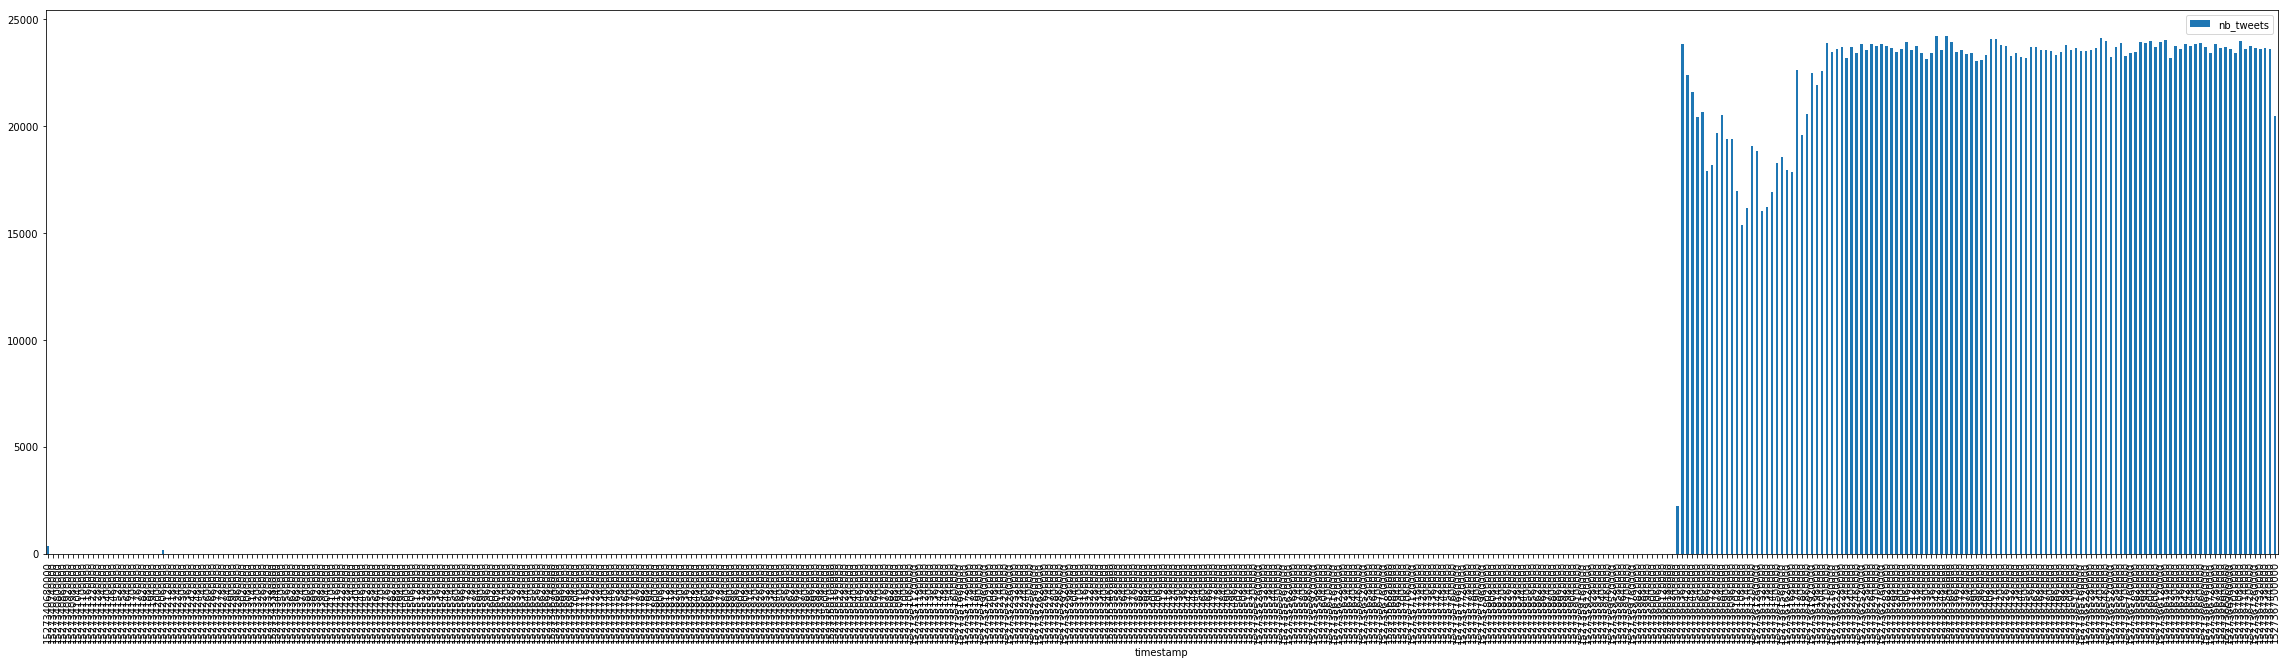

In [450]:
import pandas as pd
import matplotlib.pyplot as plt

b= pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
b= b.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets'})


b.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()


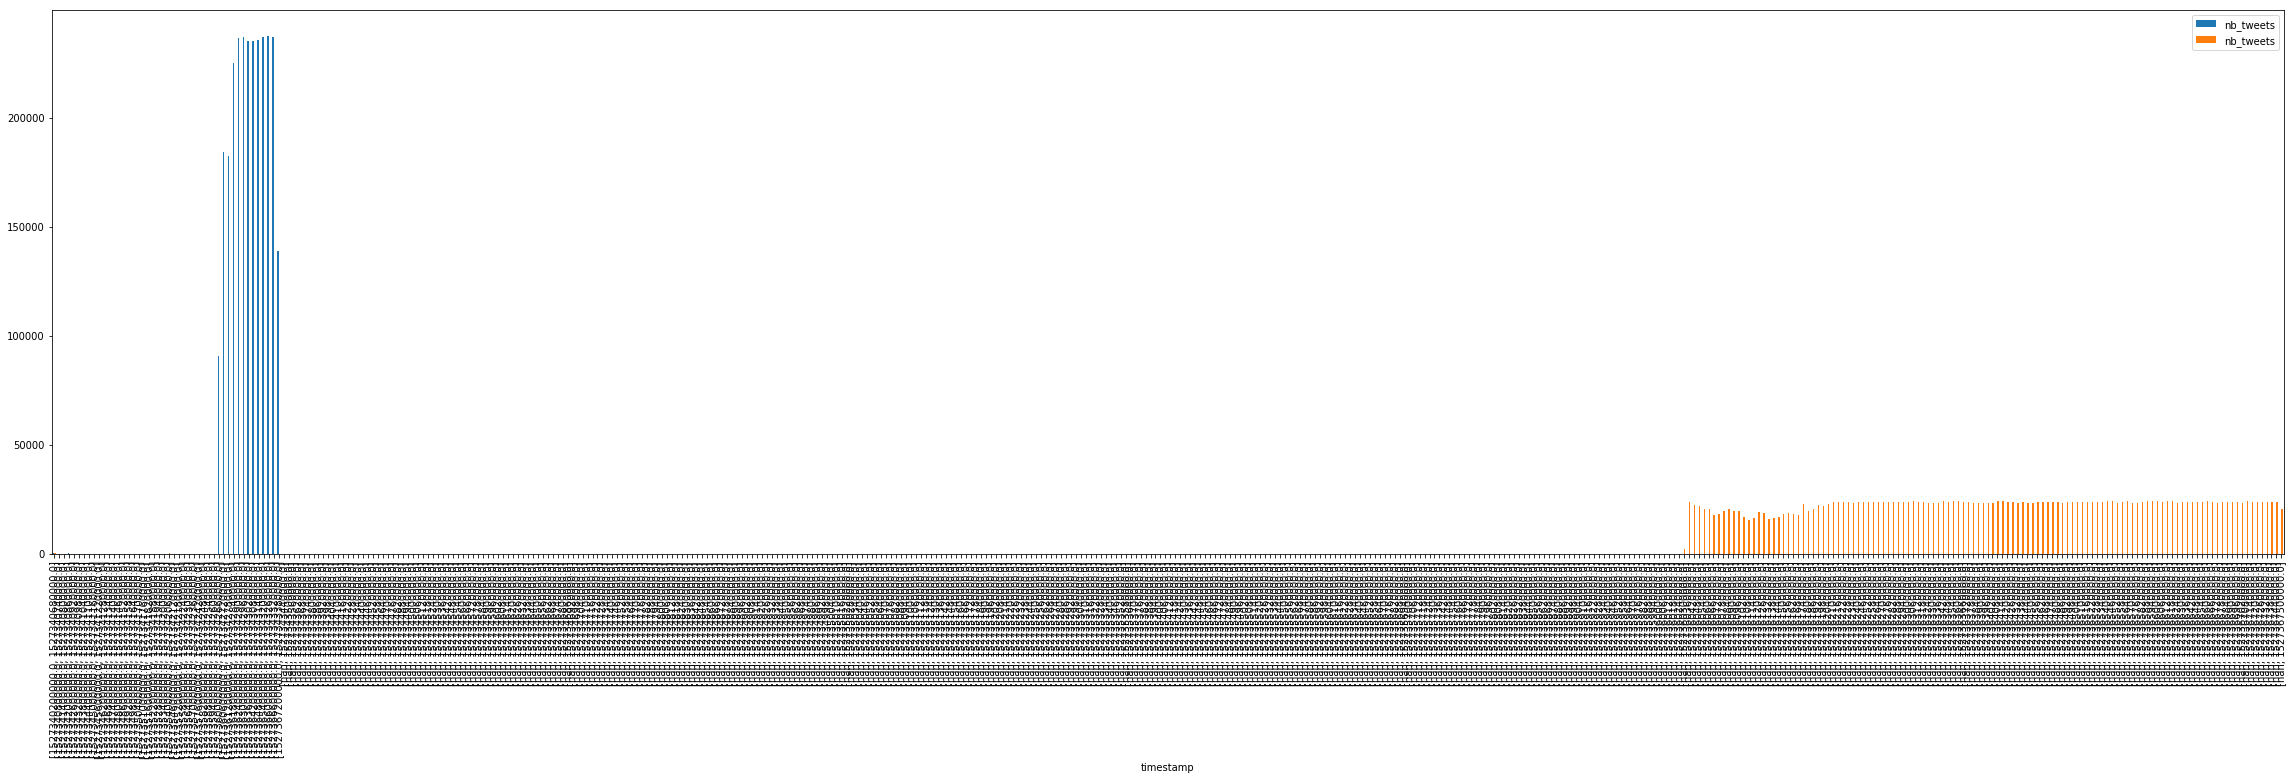

In [451]:
#grafico que compara los datos generado por los tweet que se escriben cada 1 y 10 minutos 
#respectivamente 
datos=pd.concat([a,b], axis=1)
datos.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

2) En un histograma o en un line plot, visualizar dos series de datos: 
 el número de tweets que hablan de ‘liverpool’ por cada minuto,
 el número de tweets que hablan de ‘madrid’ por cada minuto.
 ¿A qué minuto se habla más de Madrid?


In [452]:
res = es.search(index="prueba6", body={"query": {"match":{"text":"liverpool"}}})
print("Got %d Hits:" % res['hits']['total'])
for hit in res['hits']['hits']:
    print(hit["_source"])

Got 339112 Hits:
{'username': 'Wade Turnbull', 'location': 'California, USA', 'text': '#UCLfinal\n\nLiverpool,Liverpool,Liverpool,Liverpool,Liverpool,Liverpool.', 'timestamp': 1527361809270}
{'username': 'Wade Turnbull', 'location': 'California, USA', 'text': '#UCLfinal\n\nLiverpool,Liverpool,Liverpool,Liverpool,Liverpool,Liverpool.', 'timestamp': 1527361809270}
{'username': 'Trümmertom', 'location': 'Europa, Europe ≠ EU', 'text': 'Liverpool!  Liverpool!  Liverpool!  Liverpool!  Liverpool!  Liverpool!  Liverpool!  \n#TrustInKlopp\n#UCLfinal', 'timestamp': 1527360909914}
{'date': 'Sat May 26 19:10:09 +0000 2018', 'username': 'Wade Turnbull', 'location': 'California, USA', 'text': '#UCLfinal\n\nLiverpool,Liverpool,Liverpool,Liverpool,Liverpool,Liverpool.', 'timestamp': 1527361809270}
{'timestamp': 1527361809270, 'location': 'California, USA', 'text': '#UCLfinal\n\nLiverpool,Liverpool,Liverpool,Liverpool,Liverpool,Liverpool.', 'date': 'Sat May 26 19:10:09 +0000 2018', 'username': 'Wade Tu

In [453]:
res = es.search(index="prueba6", body={"aggs" : { "tweets_over_time" : \
                                                            { "date_histogram" : { "field" : \
                                                                                  "timestamp", "interval" : "1m" \
                                                                                 }}}})

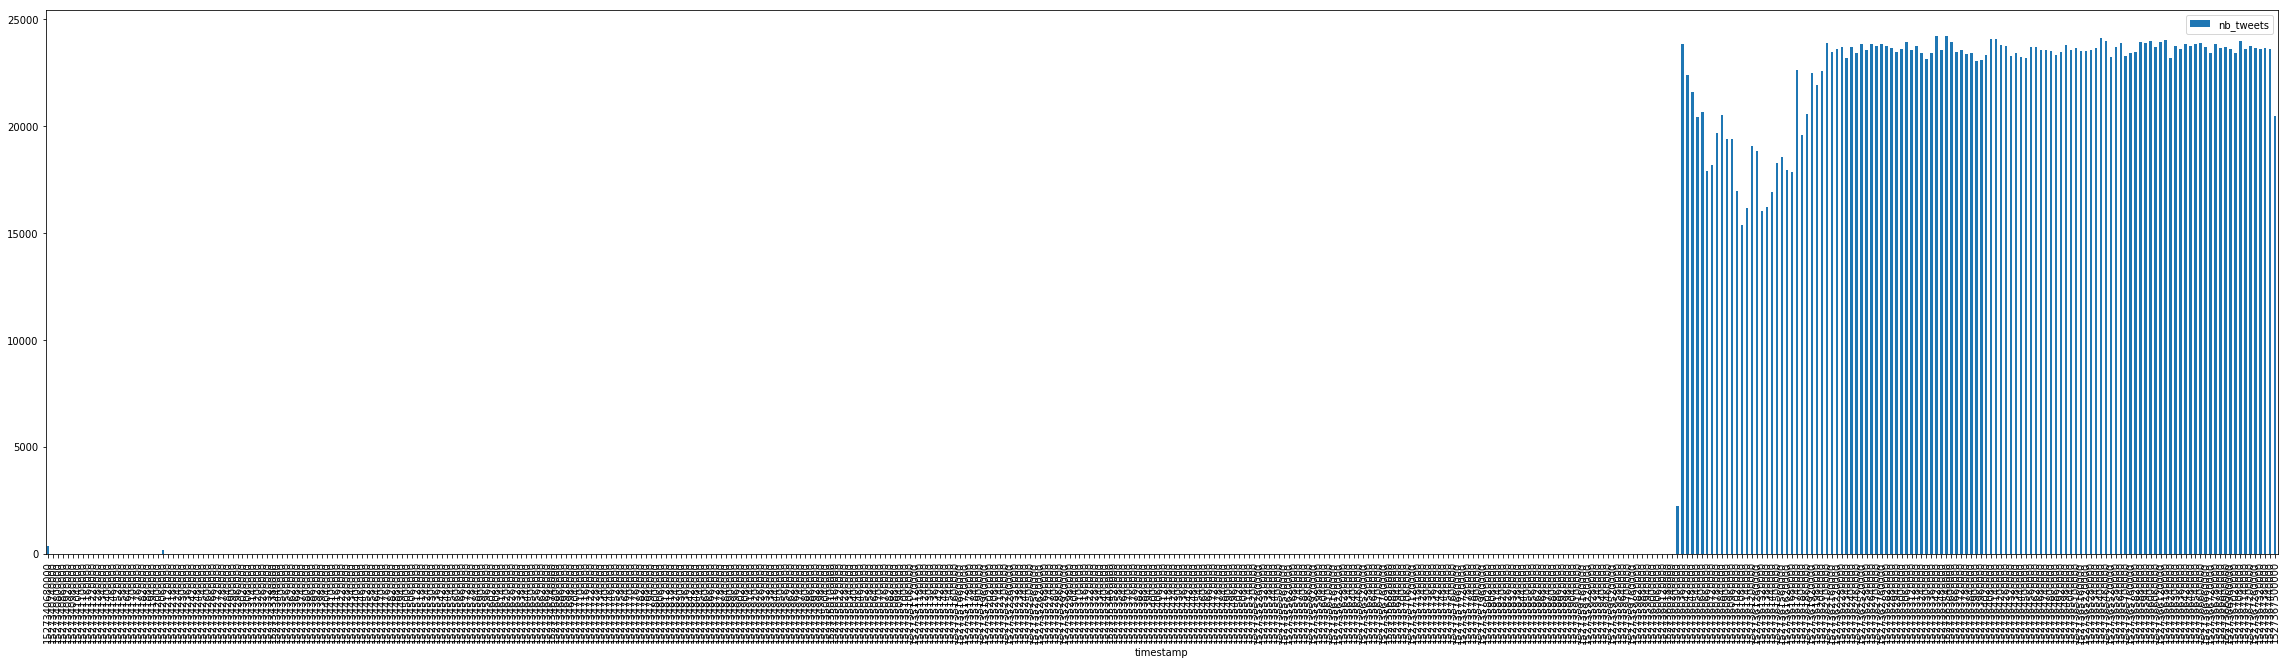

In [454]:
import pandas as pd
import matplotlib.pyplot as plt

c= pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
c= c.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets'})


c.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

In [455]:
res = es.search(index="prueba6", body={"query": {"match":{"text":"madrid"}}})
print("Got %d Hits:" % res['hits']['total'])
for hit in res['hits']['hits']:
    print(hit["_source"])

Got 247239 Hits:
{'username': 'Z.', 'location': 'Islamabad, Pakistan ', 'text': 'Hala Madrid\nHala Madrid \nHala Madrid \nHala Madrid \nHala Madrid\nHala Madrid \nHala Madrid \nHala Madrid \n #UCLfinal', 'timestamp': 1527360858345}
{'username': 'Z.', 'location': 'Islamabad, Pakistan ', 'text': 'Hala Madrid\nHala Madrid \nHala Madrid \nHala Madrid \nHala Madrid\nHala Madrid \nHala Madrid \nHala Madrid \n #UCLfinal', 'timestamp': 1527360858345}
{'username': 'Z.', 'location': 'Islamabad, Pakistan ', 'text': 'Hala Madrid\nHala Madrid \nHala Madrid \nHala Madrid \nHala Madrid\nHala Madrid \nHala Madrid \nHala Madrid \n #UCLfinal', 'timestamp': 1527360858345}
{'username': 'Z.', 'location': 'Islamabad, Pakistan ', 'text': 'Hala Madrid\nHala Madrid \nHala Madrid \nHala Madrid \nHala Madrid\nHala Madrid \nHala Madrid \nHala Madrid \n #UCLfinal', 'timestamp': 1527360858345}
{'username': 'Z.', 'location': 'Islamabad, Pakistan ', 'text': 'Hala Madrid\nHala Madrid \nHala Madrid \nHala Madrid \nHala

In [456]:
res = es.search(index="prueba6", body={"aggs" : { "tweets_over_time" : \
                                                            { "date_histogram" : { "field" : \
                                                                                  "timestamp", "interval" : "1m" \
                                                                                 }}}})

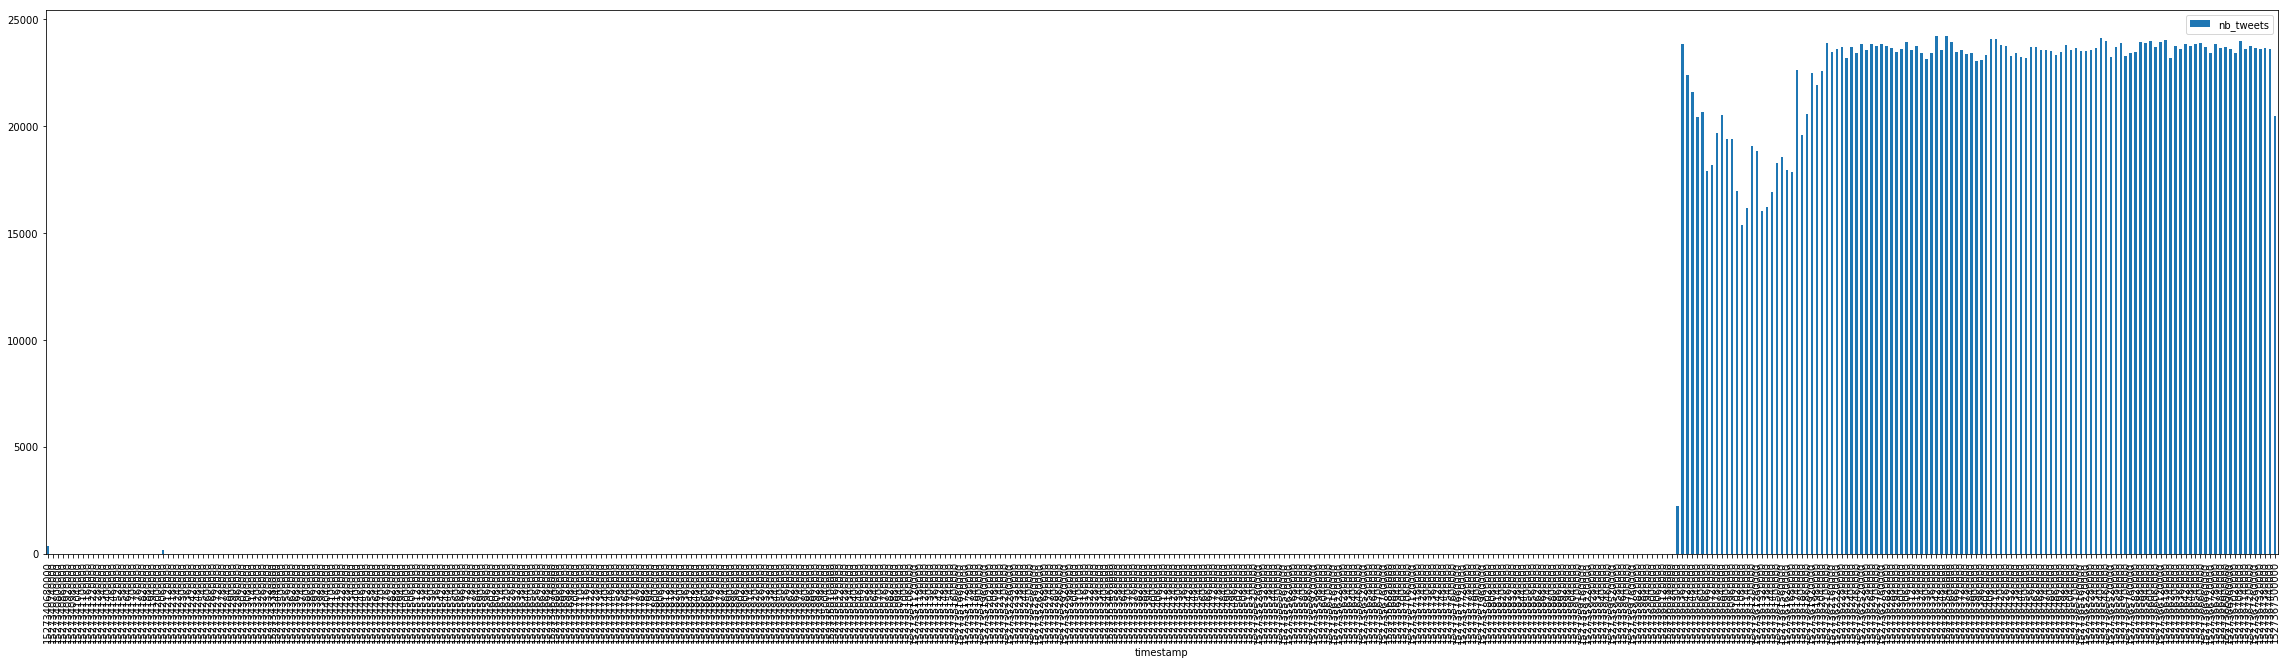

In [457]:
import pandas as pd
import matplotlib.pyplot as plt

d= pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
d= d.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets'})


d.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

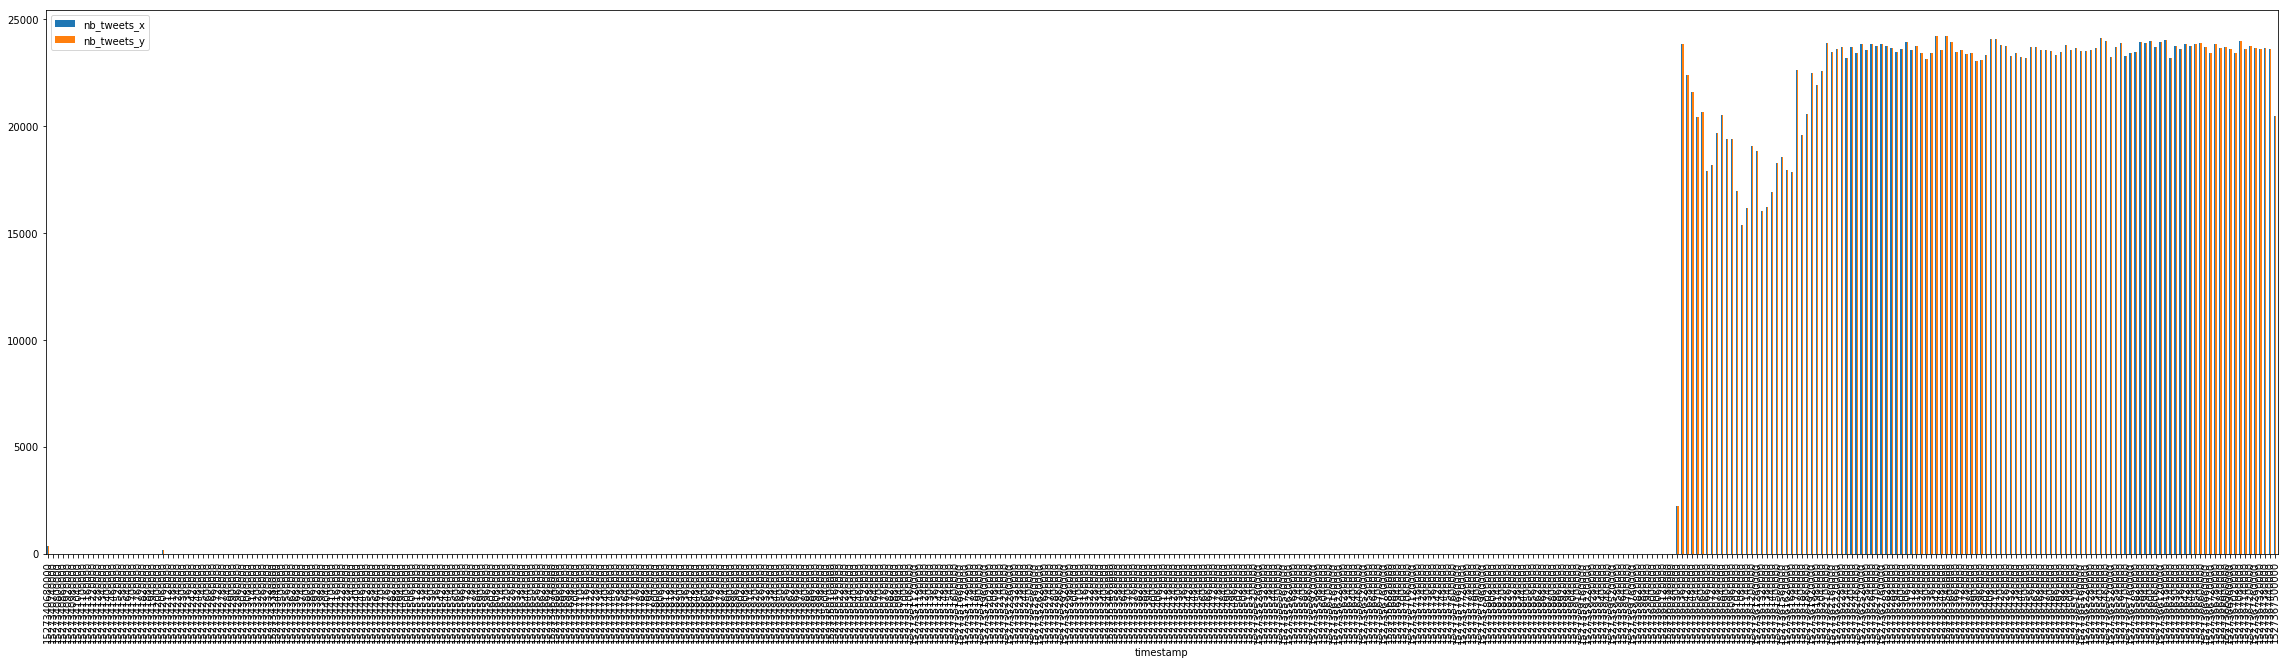

In [458]:
#mediante el uso de merge realizando la union mediante el atributo "timespamp" 
#se pretende comparar a traves de un solo gráfico como se comportan los tweets
#que contienen la palabra "madrid" y "liverpool"

grafico=pd.merge(c,d,on='timestamp')
grafico.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

In [459]:
import datetime

def timestamp2date(x):
    y = datetime.datetime.fromtimestamp(x/1000).strftime('%H:%M:%S')
    return y

d['timestamp']=d['timestamp'].apply(timestamp2date)
d[:1]

#se habla mas del madrid a las 09:18:00

,nb_tweets,timestamp
0,348,09:18:00


4)  En un histograma o en un line plot, visualizar dos series de datos:
 el número de tweets enviado desde Inglaterra, por cada minuto.
 el número de tweets enviado desde España, por cada minuto.


In [460]:
res = es.search(index="prueba6", body={"query": {"match":{"location":"Inglaterra"}}})
print("Got %d Hits:" % res['hits']['total'])
for hit in res['hits']['hits']:
    print(hit["_source"])

Got 299 Hits:
{'username': 'Proyecto Premier', 'location': 'Inglaterra', 'text': "70' #RealMadrid 2-1 #Liverpool | AL PALO MANÉ!! Disparo desde la frontal que la estampa contra el palo #UCLfinal", 'timestamp': 1527365730941}
{'username': 'PREMIER LEAGUE 🇬🇧', 'location': 'Inglaterra', 'text': 'Ya se juega en Kiev!\nReal Madrid 0-0 Liverpool\n#UCLfinal https://t.co/89BwTOjVn8', 'timestamp': 1527360358603}
{'username': 'PREMIER LEAGUE 🇬🇧', 'location': 'Inglaterra', 'text': "@Liverpool_GO @FichajeGoleador @UEFA_Goleador @RealMadrid_GO @Espana_Goleador 45' Gran cambio de frente y llegaba N… https://t.co/ieDeIMQj2k", 'timestamp': 1527363049782}
{'username': 'Proyecto Premier', 'location': 'Inglaterra', 'text': "70' #RealMadrid 2-1 #Liverpool | AL PALO MANÉ!! Disparo desde la frontal que la estampa contra el palo #UCLfinal", 'timestamp': 1527365730941}
{'username': 'PREMIER LEAGUE 🇬🇧', 'location': 'Inglaterra', 'text': "RT @Liverpool_GO: 23' Paradon de Keylor, buen intento de los nuestros.\n\

In [461]:
res = es.search(index="prueba6", body={"aggs" : { "tweets_over_time" : \
                                                            { "date_histogram" : { "field" : \
                                                                                  "timestamp", "interval" : "1m" \
                                                                                 }}}})

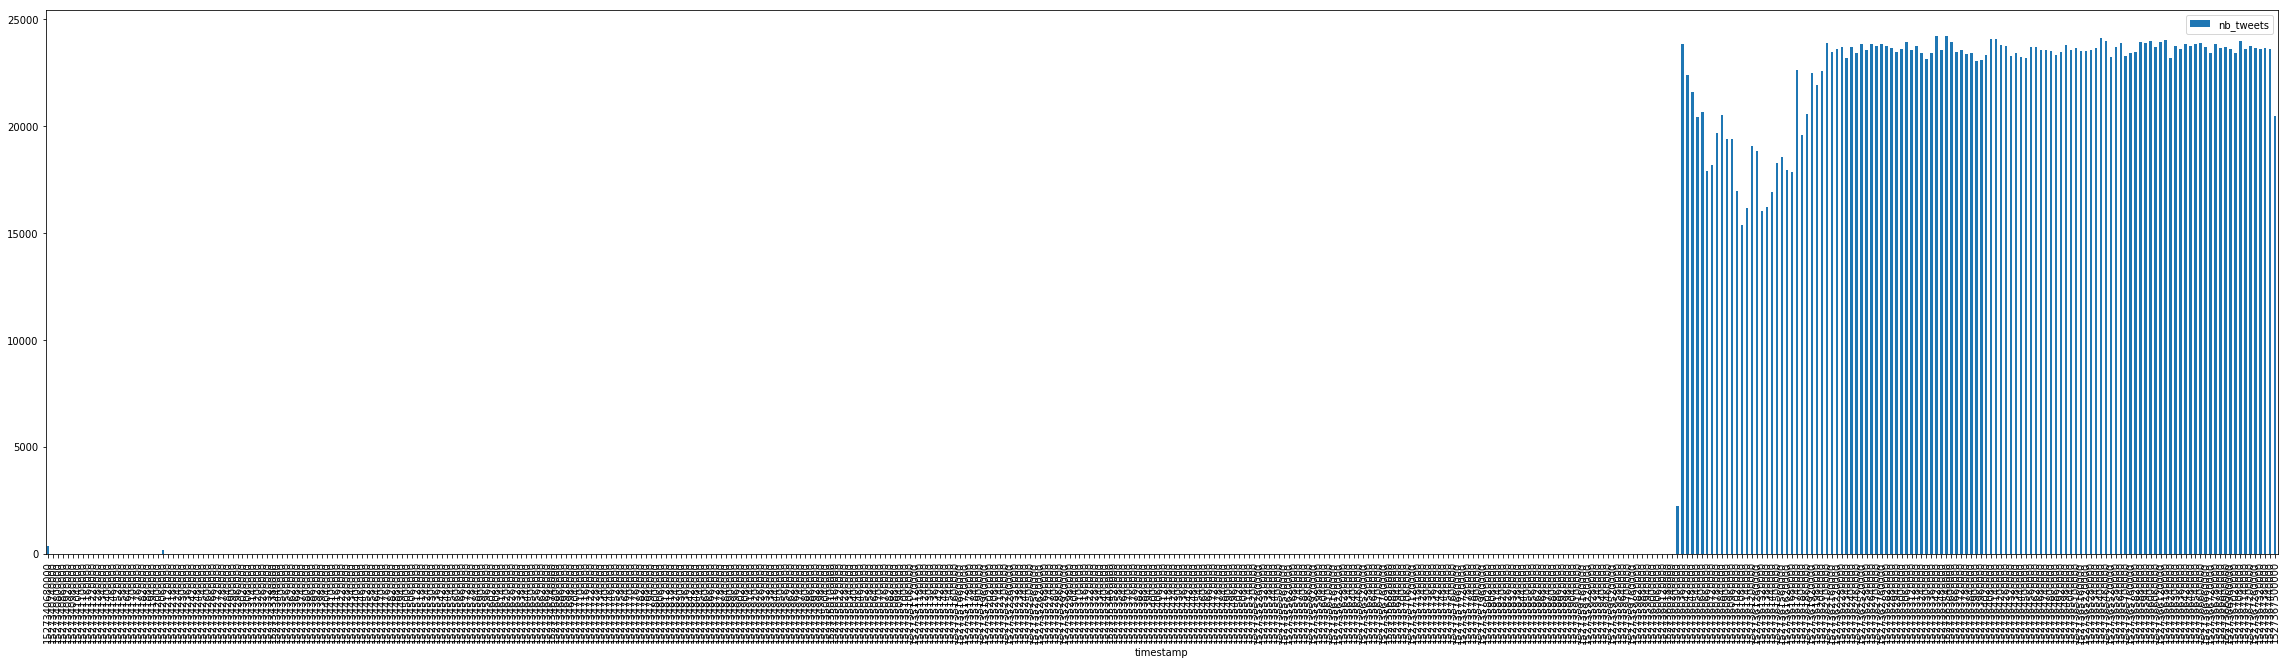

In [462]:
import pandas as pd
import matplotlib.pyplot as plt
e= pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
e= e.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets'})


e.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

In [336]:
res = es.search(index="prueba6", body={"query": {"match":{"location":"España"}}})
print("Got %d Hits:" % res['hits']['total'])
for hit in res['hits']['hits']:
    print(hit["_source"])

Got 34101 Hits:
{'username': 'Lewis El Lento', 'location': 'España, ESPAÑA', 'text': 'Se confirma la flor en el culo de Zidane en la #UCLfinal : lesión de Salah, dos cagadas del portero, ... pero así se ganan finales', 'timestamp': 1527366790773}
{'username': 'Lewis El Lento', 'location': 'España, ESPAÑA', 'text': 'Se confirma la flor en el culo de Zidane en la #UCLfinal : lesión de Salah, dos cagadas del portero, ... pero así se ganan finales', 'timestamp': 1527366790773}
{'username': 'Lewis El Lento', 'location': 'España, ESPAÑA', 'text': 'Se confirma la flor en el culo de Zidane en la #UCLfinal : lesión de Salah, dos cagadas del portero, ... pero así se ganan finales', 'timestamp': 1527366790773}
{'username': 'Lewis El Lento', 'location': 'España, ESPAÑA', 'text': 'Se confirma la flor en el culo de Zidane en la #UCLfinal : lesión de Salah, dos cagadas del portero, ... pero así se ganan finales', 'timestamp': 1527366790773}
{'date': 'Sat May 26 20:33:10 +0000 2018', 'username': 'Lewi

In [337]:
res = es.search(index="prueba6", body={"aggs" : { "tweets_over_time" : \
                                                            { "date_histogram" : { "field" : \
                                                                                  "timestamp", "interval" : "1m" \
                                                                                 }}}})

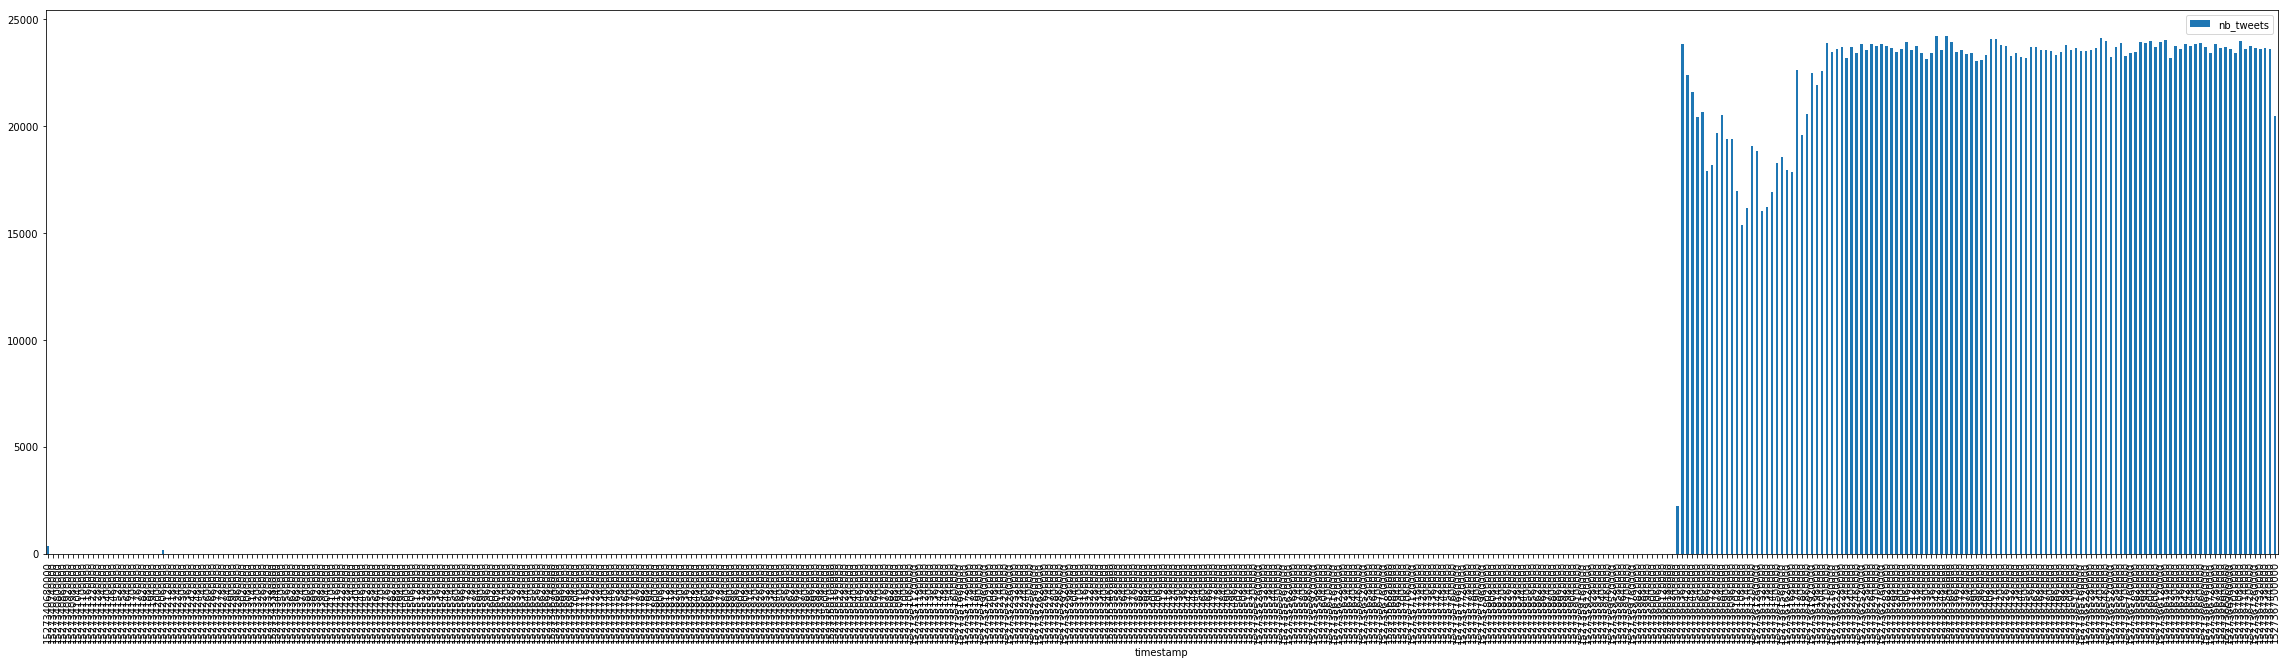

In [338]:
import pandas as pd
import matplotlib.pyplot as plt

e= pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
e= e.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets'})

e.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

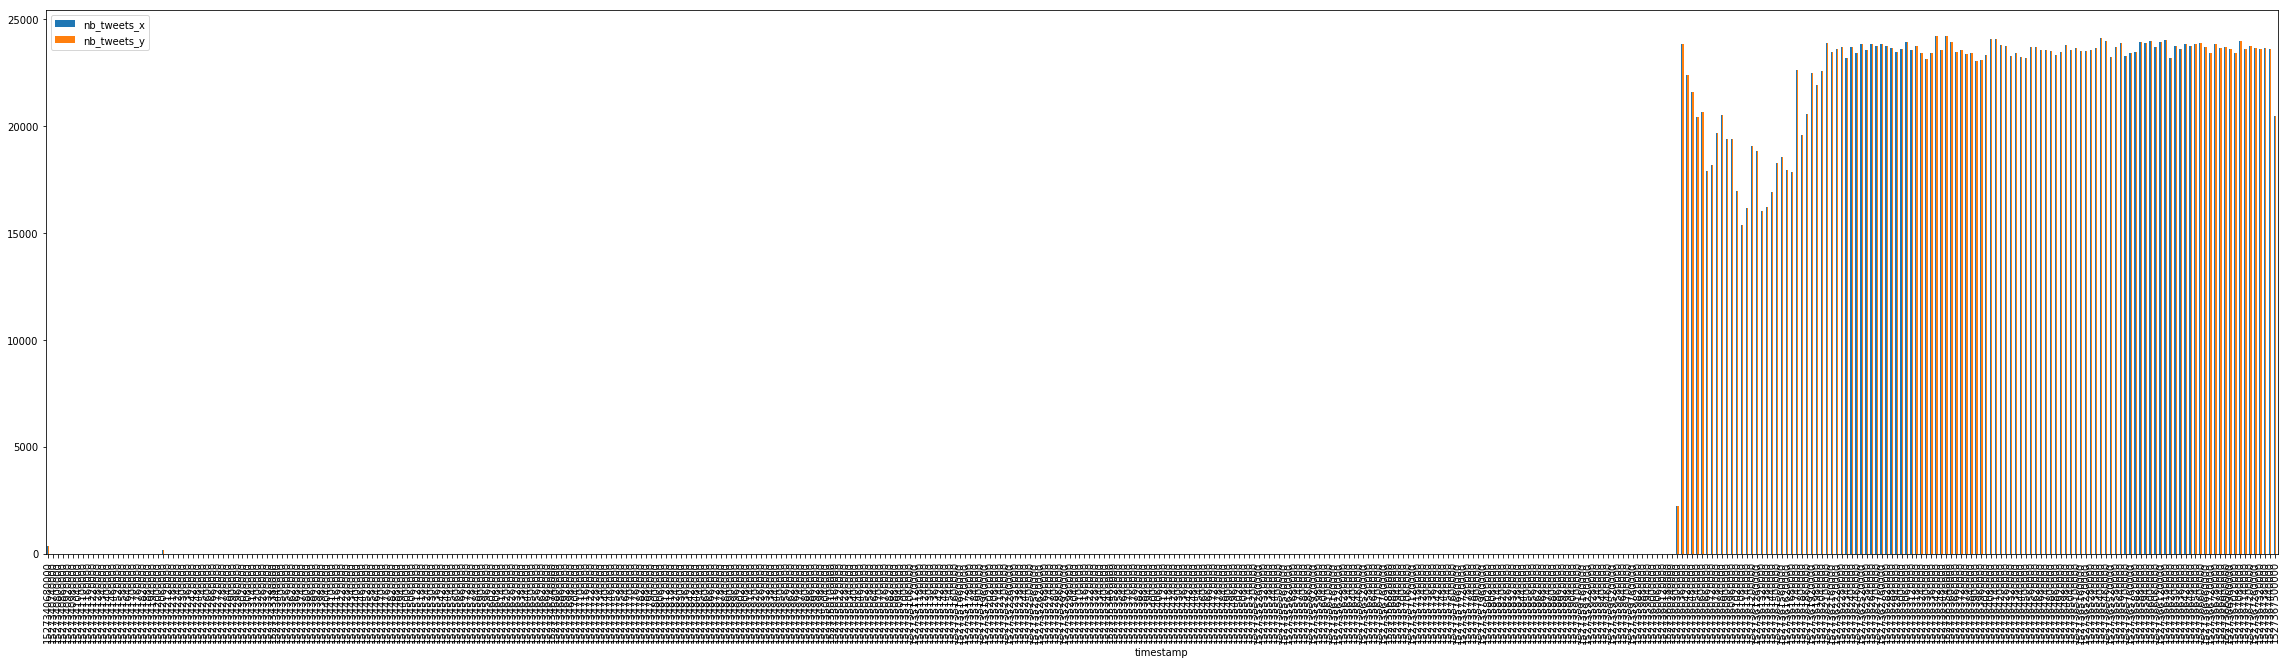

In [346]:
#mediante el uso de merge realizando la union mediante el atributo "timespamp" 
#se pretende comparar a traves de un solo gráfico como se comportan los tweets
#que contienen la palabra "España" e "Ingaleterra

grafico2=pd.merge(d,e,on='timestamp')
grafico2.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

5) Cómo podríamos analizar las emociones expresadas durante el partido? Proponer una metodología para responder a esta pregunta. (No es obligatorio implementar su metodología pero debe ser factible con las tecnologías que conocen). 


In [ ]:
Se podria incorporar una series de emoticones como  los que implemento
facebook hace un tiempo atras (me gusta,me endafa,etc).Dichos emoticones 
irian asociados a un campo de dato "emoticon" dentro de los datos.
Para poder hacer un estudio de las emociones expresadas durante un evento social
,como por ejemplo partido de la uefa champions league, bastaria simplemente 
con acceder al campo de datos que contiene al emoticon y desde alli realizar 
una serie de consultas,como por ejemplo contar cuantas personas colocaron el
emoticon "me gusta" en un determinado tiempo .